# Toronto Apartment Rent Prediction using Linear Regression
This notebook demonstrates a linear regression model implemented from scratch using python and required libraries. The goal is to predict monthly apartment rent in downtown Toronto based solely on apartment size (in square feet). Real-world rental data was manually collected from [Rentals.ca](https://www.rentals.ca/).

What we did:
- Implemented a linear regression model from scratch
- Train it on real-world apartment rent data
- Visualize the results using plots
- Make a prediction given an input

## Importing Required Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

##Linear regression model implementation from scratch

In [3]:
class linearRegression:
  def __init__(self):
    self.weights = None
    self.bias = None
  def fit(self, X, y, epochs=10000, lr=0.000002):
    n_samples = X.shape[0]
    self.bias = 0
    self.weights = np.zeros(X.shape[1])

    for i in range(epochs):
      y_pred = X.dot(self.weights) + self.bias
      error = y_pred - y
      dw = (2/n_samples) * X.T.dot(error)
      db = (2/n_samples) * np.sum(error)
      self.weights -= lr * dw
      self.bias -= lr * db

  def predict(self, X):
    y_pred = X.dot(self.weights) + self.bias
    return y_pred
  def MSE(self, y_true, y_pred):
    n_samples = len(y_true)
    return np.mean((y_true - y_pred) ** 2)


In [4]:
sizes = np.array([
    356, 342, 342, 371, 371, 416, 482, 500,
    705, 705, 713, 665, 884, 884, 878, 884,
    880, 884, 884, 509, 444, 463,
    745, 700, 546, 498, 745, 801
]).reshape(-1, 1)

# Corresponding prices in CAD
prices = np.array([
    1820, 1970, 1990, 2045, 2050, 2195, 2120, 2080,
    2405, 2590, 2370, 2355, 2895, 2900, 2975, 3100,
    3205, 3285, 3285, 2550, 2565, 2575,
    3350, 2950, 2395, 2440, 3350, 3045
])
lin = linearRegression()
lin.fit(sizes, prices)
y_pred = lin.predict(sizes)

Let’s say I’m looking for an apartment to rent with my friends, and we're considering a unit that’s around 600 square feet.
Let’s use our model to predict the monthly rent for that apartment size.

In [7]:
lin.predict(np.array([600]))

np.float64(2372.8095727119844)

Based on our model, an apartment of 600 sq. ft is estimated to cost approximately \$2372 per month.

## Plotting the Regression Line

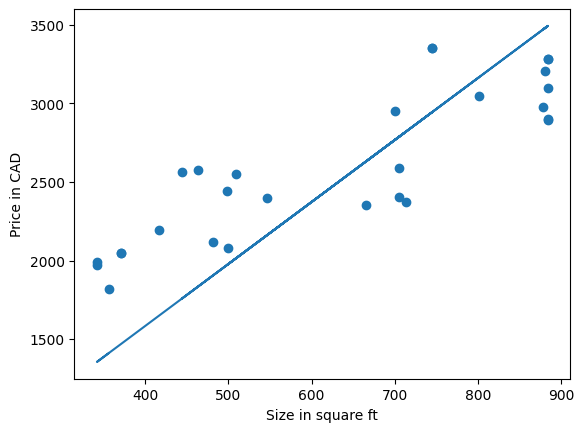

In [5]:
plt.scatter(sizes, prices)
plt.plot(sizes, y_pred)
plt.ylabel("Price in CAD")
plt.xlabel("Size in square ft")
plt.show()

**Observations:**
- The model captures the general upward trend: larger apartments typically cost more.
- It tends to underestimate rent prices for smaller apartments, likely due to higher price per square foot.
- Several larger apartments appear underpriced relative to the model, which could be due to factors like location, amenities, or building age — variables not captured by this simple model.

